# Libraries

In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Data Undestanding

In [2]:
data= pd.read_csv("C://Users//sahil//OneDrive//Desktop//data.csv", low_memory=False)

In [3]:
data.shape

(855969, 73)

In [4]:
data.size

62485737

In [5]:
data.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [7]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


In [8]:
data.count()

id                  855969
member_id           855969
loan_amnt           855969
funded_amnt         855969
funded_amnt_inv     855969
                     ...  
total_rev_hi_lim    788656
inq_fi               13288
total_cu_tl          13288
inq_last_12m         13288
default_ind         855969
Length: 73, dtype: int64

  #                                                         Data Cleaning

## Handling missing values

In [9]:
# Columns having null values
li=[]
for i in data.columns:
    if data[i].count() != 855969:
        li.append(i)
print(li)    

['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [10]:
# When null values are greater than 30 percent we drop those columns
ab_30=[]
for i in data.columns:
    if data[i].count() <= 855969*0.3:
        ab_30.append(i)
print(ab_30)

['desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [11]:
data = data.drop(ab_30,axis="columns")

In [12]:
data.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      49443
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                             34
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq        439812
open_acc                           0
p

In [13]:
data["emp_title"].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'machining Cell Lead',
       'KYC Business Analyst', 'Manager Hotel Operations Oasis '],
      dtype=object)

In [14]:
data["emp_title"].mode()

0    Teacher
Name: emp_title, dtype: object

In [15]:
data["emp_title"] = data["emp_title"].fillna("Teacher")

In [16]:
data["emp_title"].isnull().sum()

0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          855969 non-null  int64  
 1   member_id                   855969 non-null  int64  
 2   loan_amnt                   855969 non-null  int64  
 3   funded_amnt                 855969 non-null  int64  
 4   funded_amnt_inv             855969 non-null  float64
 5   term                        855969 non-null  object 
 6   int_rate                    855969 non-null  float64
 7   installment                 855969 non-null  float64
 8   grade                       855969 non-null  object 
 9   sub_grade                   855969 non-null  object 
 10  emp_title                   855969 non-null  object 
 11  emp_length                  812908 non-null  object 
 12  home_ownership              855969 non-null  object 
 13  annual_inc    

In [18]:
data["title"]
print(data["title"].mode())
data["title"]= data["title"].fillna("Debt consolidation")

0    Debt consolidation
Name: title, dtype: object


In [19]:
data["title"].isnull().sum()

0

In [20]:
data.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                          0
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq        439812
open_acc                           0
p

In [21]:
mean=data["revol_util"].mean()
data["revol_util"]=data["revol_util"].fillna(mean)

In [22]:
data.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                          0
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq        439812
open_acc                           0
p

In [23]:
data=data.drop(["mths_since_last_delinq","next_pymnt_d"],axis=1)

In [24]:
#these columns are dropped becoz they are dates and date can't be computed
data=data.drop(["last_pymnt_d","collections_12_mths_ex_med","last_credit_pull_d"],axis=1)

In [25]:
data=data.drop(["member_id","addr_state","funded_amnt_inv","loan_amnt",
                "acc_now_delinq","initial_list_status","delinq_2yrs"],axis=1)

In [26]:
data.isnull().sum()

id                             0
funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                 43061
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
purpose                        0
title                          0
zip_code                       0
dti                            0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_

In [27]:
data["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [28]:
data["emp_length"] = data["emp_length"].replace({'10+ years':10, '< 1 year':1, '1 year':1, '3 years':3, '8 years':8,
                                                 '9 years':9,'4 years':4, '5 years':5, '6 years':6, '2 years':2, '7 years':7})

In [29]:
data["emp_length"].dtype
data["emp_length"]

0         10.0
1          1.0
2         10.0
3         10.0
4          1.0
          ... 
855964     8.0
855965    10.0
855966     5.0
855967     1.0
855968    10.0
Name: emp_length, Length: 855969, dtype: float64

In [30]:
data["emp_length"]=data["emp_length"].fillna(data["emp_length"].mean())

In [31]:
data["emp_length"].isnull().sum()

0

In [32]:
data.isnull().sum()

id                             0
funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
purpose                        0
title                          0
zip_code                       0
dti                            0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_

In [33]:
# Select only numeric columns
data_numeric = data.select_dtypes(include=np.number).dropna()

# Print the numeric columns
print(data_numeric)

              id  funded_amnt  int_rate  installment  emp_length  annual_inc  \
39694   10149342        27050     10.99       885.46        10.0     55000.0   
39695   10159584         9750     13.98       333.14         1.0     26000.0   
39696   10159498        12000      6.62       368.45        10.0    105000.0   
39697   10139658        12000     13.53       407.40        10.0     40000.0   
39698   10159548        15000      8.90       476.30         2.0     63000.0   
...          ...          ...       ...          ...         ...         ...   
855964  36371250        10000     11.99       332.10         8.0     31000.0   
855965  36441262        24000     11.99       797.03        10.0     79000.0   
855966  36271333        13000     15.99       316.07         5.0     35000.0   
855967  36490806        12000     19.99       317.86         1.0     64400.0   
855968  36271262        20000     11.99       664.20        10.0    100000.0   

          dti  inq_last_6mths  open_acc

In [34]:
data["policy_code"].value_counts()

policy_code
1    855969
Name: count, dtype: int64

In [35]:
data = data.drop('policy_code',axis=1)

In [36]:
# Assuming 'tot_coll_amt' is the column you want to correlate with other columns
correlation = data_numeric.corr()['tot_coll_amt']
correlation[correlation>0]

id                0.004233
int_rate          0.001129
annual_inc        0.001005
inq_last_6mths    0.003181
open_acc          0.000071
pub_rec           0.006816
total_acc         0.006463
tot_coll_amt      1.000000
Name: tot_coll_amt, dtype: float64

In [37]:
# Assuming 'target_column' is the column with missing values
# 'feature_columns' are the columns used as features to predict the missing values

# Split the data into two sets: one with missing values and one without
data_missing = data[data['tot_coll_amt'].isnull()]
data_not_missing = data.dropna(subset=['tot_coll_amt'])

# Define the features and target variables
X = data_not_missing[['int_rate', 'annual_inc', 'inq_last_6mths', 'pub_rec', 'total_acc']]
y = data_not_missing['tot_coll_amt']

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients (weights) and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# # Predict the target values for the missing data
predicted_values = model.predict(data_missing[['int_rate', 'annual_inc', 'inq_last_6mths', 'pub_rec', 'total_acc']])

# # Fill in the missing values with the predicted values
data.loc[data['tot_coll_amt'].isnull(), 'tot_coll_amt'] = predicted_values


Coefficients: [1.53136571e+00 1.50883340e-05 2.07560211e+01 1.14321975e+02
 5.63332888e+00]
Intercept: 26.080295787112476


In [38]:
data["tot_coll_amt"].isnull().sum()

0

In [39]:
data[data["tot_coll_amt"]<0]

,id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind


In [40]:
# Assuming 'tot_cur_bal' is the column you want to correlate with other columns
correlation = data_numeric.corr()['tot_cur_bal']
z=correlation[correlation>0.1]
zm = z[:-2]
zmm=zm.index.tolist()
print(zmm)

['funded_amnt', 'installment', 'annual_inc', 'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt']


In [41]:
# Assuming 'target_column' is the column with missing values
# 'feature_columns' are the columns used as features to predict the missing values

# Split the data into two sets: one with missing values and one without
data_missing = data[data['tot_cur_bal'].isnull()]
data_not_missing = data.dropna(subset=['tot_cur_bal'])

# Define the features and target variables
X = data_not_missing[['funded_amnt',  'annual_inc','revol_bal', 'total_acc', 
                      'out_prncp_inv',  'total_rec_prncp']]

y = data_not_missing['tot_cur_bal']

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients (weights) and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)

#  Predict the target values for the missing data
predicted_values = model.predict(data_missing[['funded_amnt',  'annual_inc','revol_bal', 'total_acc', 
                      'out_prncp_inv',  'total_rec_prncp']])

# # Fill in the missing values with the predicted values
data.loc[data['tot_cur_bal'].isnull(), 'tot_cur_bal'] = predicted_values

Coefficients: [8.32614127e-01 6.47374359e-01 2.00100073e+00 2.43259876e+03
 8.02671401e-01 1.38342948e+00]
Intercept: -32913.48311039418


In [42]:
data["tot_cur_bal"].isnull().sum()
deli = data[data["tot_cur_bal"]<0].index.tolist()
deli

[1457,
 1675,
 1928,
 2412,
 2450,
 2494,
 3110,
 3201,
 4210,
 4233,
 4240,
 4712,
 4766,
 4818,
 5031,
 5259,
 5484,
 5520,
 5987,
 6385,
 6553,
 6623,
 6748,
 6952,
 7084,
 7288,
 7370,
 7433,
 7444,
 7577,
 7751,
 7970,
 8100,
 8414,
 8459,
 9068,
 9083,
 9271,
 9276,
 9388,
 9467,
 9500,
 9595,
 9916,
 9988,
 10265,
 10463,
 10494,
 10675,
 10680,
 10749,
 10826,
 10954,
 11176,
 11541,
 12026,
 12500,
 12574,
 12810,
 13384,
 13523,
 13855,
 13928,
 14095,
 14102,
 14638,
 14758,
 14784,
 14959,
 15092,
 15278,
 15396,
 15500,
 15547,
 15853,
 16059,
 16094,
 16203,
 16242,
 16491,
 16575,
 16620,
 16825,
 17032,
 17057,
 17252,
 17274,
 17333,
 17370,
 17402,
 17464,
 17486,
 17507,
 17586,
 17943,
 17985,
 18125,
 18227,
 18289,
 18434,
 18711,
 18747,
 19207,
 19488,
 20241,
 20315,
 20549,
 20942,
 21057,
 21585,
 21635,
 21978,
 22061,
 22636,
 23060,
 23211,
 23278,
 23508,
 24087,
 24563,
 24746,
 24916,
 24934,
 24935,
 25001,
 25011,
 25359,
 25389,
 25478,
 25497,
 2584

In [43]:
data = data.drop(deli,axis=0)

In [44]:
data.isnull().sum()

id                             0
funded_amnt                    0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
purpose                        0
title                          0
zip_code                       0
dti                            0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_

In [45]:
# Assuming 'total_rev_hi_lim' is the column you want to correlate with other columns
correlation = data_numeric.corr()['total_rev_hi_lim']
correlation[correlation>0.1]
cor=zm.index.tolist()
print(cor)

['funded_amnt', 'installment', 'annual_inc', 'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt']


In [46]:
# Assuming 'target_column' is the column with missing values
# 'feature_columns' are the columns used as features to predict the missing values

# Split the data into two sets: one with missing values and one without
data_missing = data[data['total_rev_hi_lim'].isnull()]
data_not_missing = data.dropna(subset=['total_rev_hi_lim'])

# Define the features and target variables
X = data_not_missing[['funded_amnt', 'installment', 'annual_inc', 'open_acc', 'revol_bal', 
                      'total_acc', 'out_prncp_inv', 'total_rec_prncp']]

y = data_not_missing['total_rev_hi_lim']

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients (weights) and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)

#  Predict the target values for the missing data
predicted_values = model.predict(data_missing[['funded_amnt', 'installment', 'annual_inc', 'open_acc', 'revol_bal',
                                               'total_acc', 'out_prncp_inv', 'total_rec_prncp']])

# # Fill in the missing values with the predicted values
data.loc[data['total_rev_hi_lim'].isnull(), 'total_rev_hi_lim'] = predicted_values

Coefficients: [ 2.50646324e-01 -1.31133653e+01  1.02438806e-02  1.02373057e+03
  1.26028872e+00  2.50223148e+01  1.75251188e-01  2.69000440e-01]
Intercept: -3873.4143246192143


In [47]:
data["total_rev_hi_lim"].isnull().sum()
dei = data[data["total_rev_hi_lim"]<0].index.tolist()
dei

[1075,
 1586,
 1859,
 1978,
 2393,
 2471,
 2687,
 3169,
 3333,
 3388,
 3640,
 3836,
 3995,
 4083,
 4301,
 4343,
 4547,
 4942,
 5119,
 5173,
 5371,
 5797,
 6490,
 6929,
 6953,
 7019,
 7140,
 7432,
 7660,
 7941,
 8052,
 8422,
 8869,
 8934,
 9153,
 9833,
 10612,
 10627,
 10670,
 10673,
 10812,
 10913,
 11109,
 11269,
 11426,
 11468,
 11502,
 11507,
 11515,
 12032,
 12131,
 12158,
 12169,
 12191,
 12217,
 12220,
 12234,
 12360,
 12705,
 12716,
 12967,
 13567,
 13776,
 13823,
 13873,
 14116,
 14228,
 14425,
 14511,
 14541,
 14615,
 14679,
 14786,
 14827,
 14970,
 15374,
 15492,
 15549,
 15555,
 15591,
 15673,
 15716,
 15788,
 15956,
 16358,
 16414,
 16450,
 16495,
 16642,
 16729,
 16786,
 16788,
 16880,
 17659,
 17905,
 17978,
 18004,
 18062,
 18176,
 18201,
 18366,
 18701,
 18808,
 19118,
 19212,
 19326,
 19650,
 20114,
 20130,
 20158,
 20296,
 20357,
 20377,
 21187,
 21292,
 21429,
 21747,
 21845,
 22031,
 22107,
 22281,
 22332,
 22831,
 22861,
 22953,
 22995,
 23103,
 23314,
 23473,
 235

In [48]:
data = data.drop(dei,axis=0)

In [49]:
data.isnull().sum()

id                         0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amn

In [50]:
data.shape

(855332, 40)

## Outlier detection and handling 

Mahalanobis distance is a technique for outlier detection in multivariate data, meaning it deals with data containing multiple variables. Unlike Euclidean distance which works well for simple two or three dimensional data, Mahalanobis distance takes into account the relationships between these variables.

Steps:
1. Finding the Center
2. Covariance Matrix
3. Standardization (if required)
4. Distance Calculation

In [51]:
from scipy.spatial.distance import mahalanobis
from scipy.linalg import inv

In [52]:
# Select only numeric columns
data_numeric = data.select_dtypes(include=np.number)
data_numeric.columns
data_numeric.isnull().sum()

id                         0
funded_amnt                0
int_rate                   0
installment                0
emp_length                 0
annual_inc                 0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
tot_coll_amt               0
tot_cur_bal                0
total_rev_hi_lim           0
default_ind                0
dtype: int64

In [53]:
# Assuming data is a pandas DataFrame
data_array = data_numeric.to_numpy()
data_array

array([[1.07750100e+06, 5.00000000e+03, 1.06500000e+01, ...,
        4.29067664e+04, 1.73317118e+04, 0.00000000e+00],
       [1.07743000e+06, 2.50000000e+03, 1.52700000e+01, ...,
        2.32684646e+03, 1.69612124e+03, 1.00000000e+00],
       [1.07717500e+06, 2.40000000e+03, 1.59600000e+01, ...,
        1.05775979e+04, 2.41649358e+03, 0.00000000e+00],
       ...,
       [3.62713330e+07, 1.30000000e+04, 1.59900000e+01, ...,
        3.41780000e+04, 1.80000000e+04, 0.00000000e+00],
       [3.64908060e+07, 1.20000000e+04, 1.99900000e+01, ...,
        5.84180000e+04, 2.70000000e+04, 0.00000000e+00],
       [3.62712620e+07, 2.00000000e+04, 1.19900000e+01, ...,
        3.33070000e+04, 4.17000000e+04, 0.00000000e+00]])

In [54]:
mean_vector = np.mean(data_array, axis=0)
mean_vector

array([3.22641824e+07, 1.47399299e+04, 1.31921113e+01, 4.36451207e+02,
       6.10419630e+00, 7.51059209e+04, 1.81295565e+01, 6.80777756e-01,
       1.15489225e+01, 1.94660085e-01, 1.69226582e+04, 5.50381655e+01,
       2.52826692e+01, 8.29099456e+03, 8.28761115e+03, 7.65639286e+03,
       7.62541856e+03, 5.85322788e+03, 1.75583674e+03, 3.17816157e-01,
       4.70104312e+01, 4.93858531e+00, 2.22731516e+03, 2.23129888e+02,
       1.38158330e+05, 3.16872906e+04, 5.40445114e-02])

In [55]:
covariance_matrix = np.cov(data_array.T)
covariance_matrix

array([[ 5.15829421e+14,  1.22415854e+10, -1.42729147e+07,
         1.24322538e+08,  9.19207889e+05,  4.88178859e+10,
         2.61427580e+07, -2.59836360e+06,  1.05658541e+07,
         1.05782384e+06,  1.96708160e+10, -2.95613306e+07,
         7.94750555e+06,  1.07847696e+11,  1.07796513e+11,
        -1.06815359e+11, -1.05876229e+11, -8.40550929e+10,
        -2.16738148e+10, -6.17602817e+06, -1.08027537e+09,
        -1.03868581e+08, -2.53473132e+10,  9.58569009e+08,
         7.28281239e+10,  5.11110701e+10, -1.12490790e+06],
       [ 1.22415854e+10,  7.08483278e+07,  5.26718694e+03,
         1.93981814e+06,  2.99748858e+03,  1.81008878e+08,
         2.94808780e+03, -2.37073210e+02,  8.85404286e+03,
        -4.02405495e+02,  6.30571057e+07,  2.39170408e+04,
         2.19681559e+04,  4.56899520e+07,  4.56715135e+07,
         3.18365795e+07,  3.17969521e+07,  2.21736978e+07,
         9.40070980e+06,  7.91911646e+02,  2.61379984e+05,
         2.89206066e+04,  9.54256759e+06, -3.32702140e+

In [56]:
def mahalanobis_distance(point, mean, cov_inv):
    difference = point - mean
    mahalanobis_squared = difference.dot(cov_inv).dot(difference.T)
    return np.sqrt(mahalanobis_squared)


mahalanobis_distances = np.array([mahalanobis_distance(point, mean_vector, inv(covariance_matrix)) for point in data_array])

In [57]:
# leverage Mahalanobis distance

In [58]:
from scipy.stats import chi2

# Assuming your data has 'n' features (dimensions)
alpha = 0.01  # Significance level (1 - confidence level)
threshold = chi2.ppf(1 - alpha, data_array.shape[1] - 1)
threshold

45.64168266628317

In [59]:
outlier_indices = np.where(mahalanobis_distances > threshold)
#outlier_indices
zx=[ 1558,   1756,   3635,   4672,   5617,   7388,   8184,   9716,
         10406,  10611,  11027,  11326,  11957,  12043,  12317,  12534,
         12992,  13782,  13835,  17342,  17481,  17491,  17502,
         17780,  17997,  18509,  18530,  18742,  19025,  19129,  19654,
         19961,  21459,  22618,  26336,  29026,  29276,  29737,
         29745,  30231,  31057,  31436,  32207,  32399,  32411,
         32616,  32894,  33293,  33427,  33493,  33851,  33961,  34227,
         34405,  35850,  35906,  36201,  36359,  36406,  36483,  36519,
         36572,  37007,  37139,  37148,  37149,  37442,  37443,  37450,
         37507,  37522,  37579,  37788,  38005,  38390,  38509,  38522,
         38554,  38556,  38631,  38647,  38652,  38654,  38670,  38675,
         38687,  38694,  38785,  38792,  38793,  38800,  38805,  38812,
         38818,  38824,  38828,  38861,  38891,  38897,  38935,  38936,
         38944,  38954,  38955,  38961,  38964,  38979,  38986,  38996,
         39020,  39045,  39048,  39094,  39157,  44811,  48944,  56735,
         67582,  68032,  73878,  75870,  78517,  89261,  94593, 106612,
        121423, 123666, 124511, 127254, 127983, 137405, 150857, 157281,
        162151, 162957, 163001, 164860, 170748, 171805, 172139, 173596,
        177118, 177236, 186169, 195650, 196294, 198231, 202952, 203837,
        208475, 208968, 209995, 215563, 216039, 218291, 225815, 237115,
        242296, 268800, 273314, 291977, 292254, 294131, 297226, 315013,
        317358, 327259, 334912, 348805, 353044, 353904, 359563, 367288,
        382867, 403460, 403693, 405549, 407225, 410864, 422309, 423385,
        437761, 443494, 446069, 453854, 461940, 467924, 472641, 478099,
        481398, 482269, 483416, 487418, 490905, 500780, 507744, 508339,
        511229, 514326, 518627, 528509, 539857, 546141, 547736, 554359,
        560158, 569680, 570208, 572200, 574993, 598815, 604478, 622846,
        644449, 646700, 650195, 663031, 671249, 679426, 728048, 730605,
        735198, 753069, 753976, 771263, 785837, 798230, 803353, 812158,
        825075, 835736, 854620]

In [60]:
data = data.drop(zx,axis=0)

In [61]:
data.isnull().sum()

id                         0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
pymnt_plan                 0
purpose                    0
title                      0
zip_code                   0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amn

Exploratory Data Analysis (EDA) is a crucial step in data analysis,  especially before diving into machine learning models. It helps you get a feel for your data, understand its characteristics, and identify patterns and potential issues.

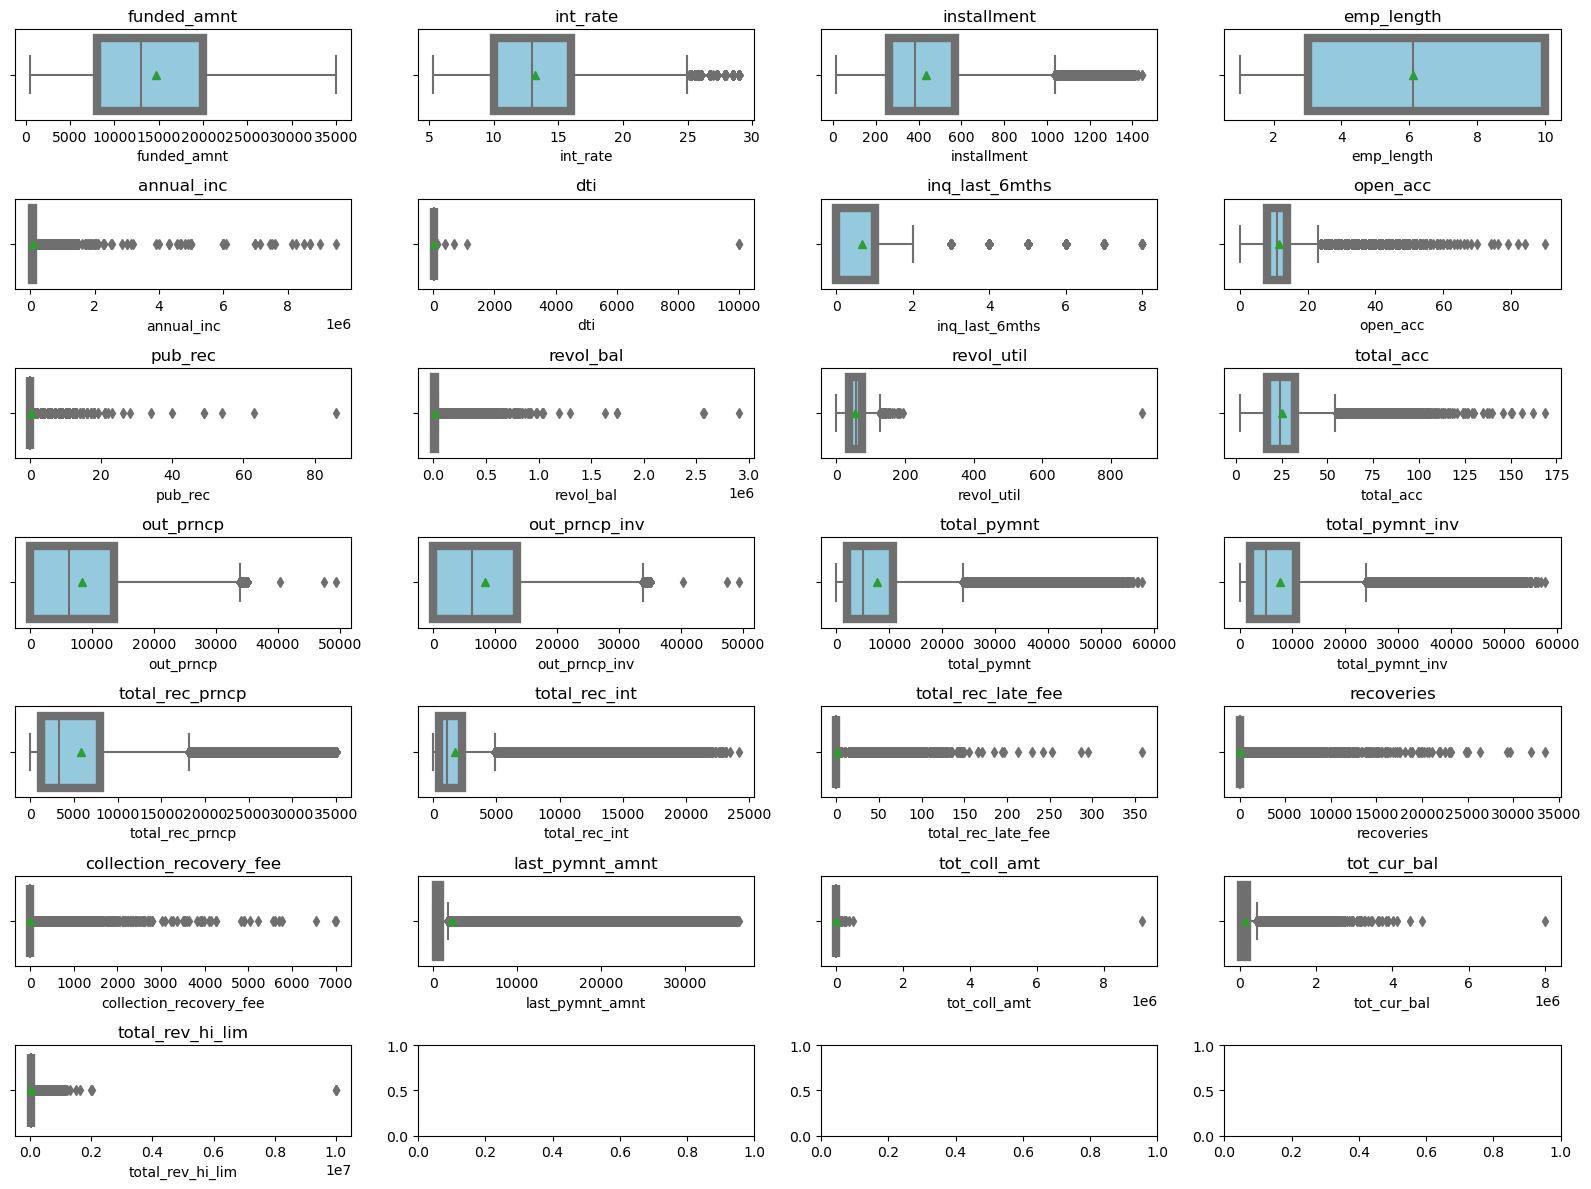

In [62]:
numeric_columns = ['funded_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
                   'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                   'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
                   'collection_recovery_fee', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal',
                   'total_rev_hi_lim']

# Create a figure with an appropriate number of rows and columns
# (Adjust figsize as needed for clarity)
fig, axes = plt.subplots(nrows=int(len(numeric_columns) / 4) + 1, ncols=4, figsize=(16, 12))

# Iterate through the numeric columns
for i, col in enumerate(numeric_columns):
    # Use seaborn's boxplot for clarity and customization
    sns.boxplot(
        x=data[col],
        ax=axes.flat[i],  # Flatten the 2D array for efficient indexing
        showmeans=True,  # Display means as diamonds
        color='skyblue',  # Customize boxplot color (optional)
        boxprops={'linewidth': 6, 'zorder': 0.5}
    )
    axes.flat[i].set_title(col)  # Set title for each subplot

# Adjust layout (optional)
plt.tight_layout()

# Display the combined box plots
plt.show()

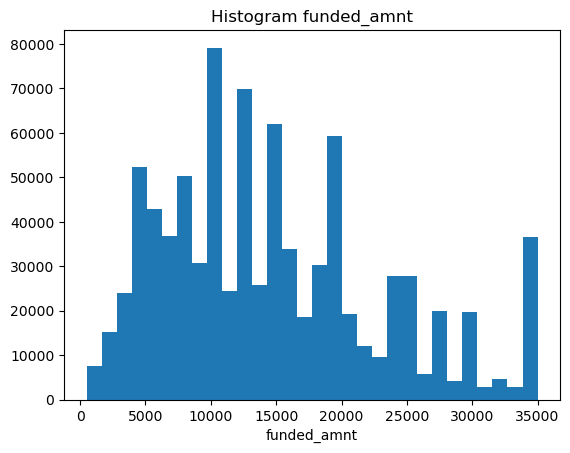

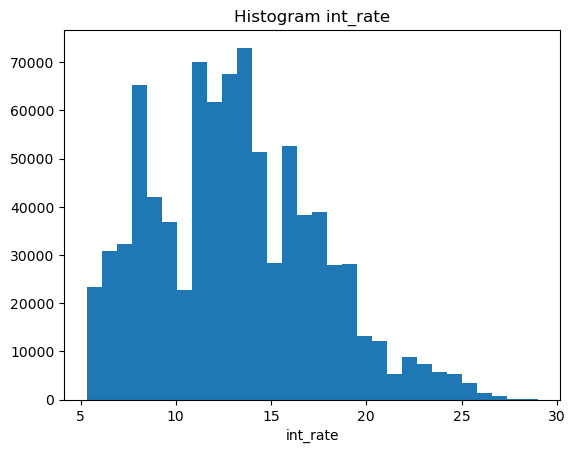

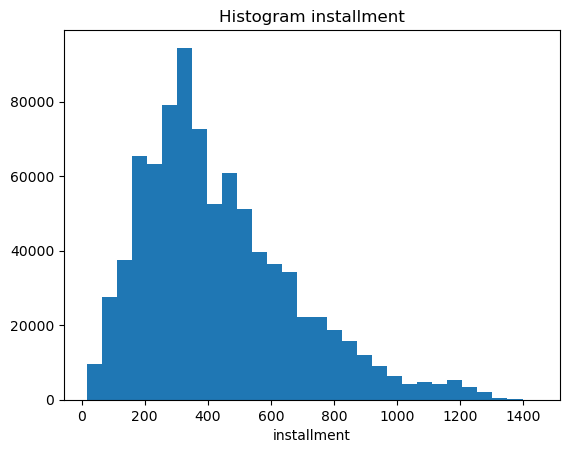

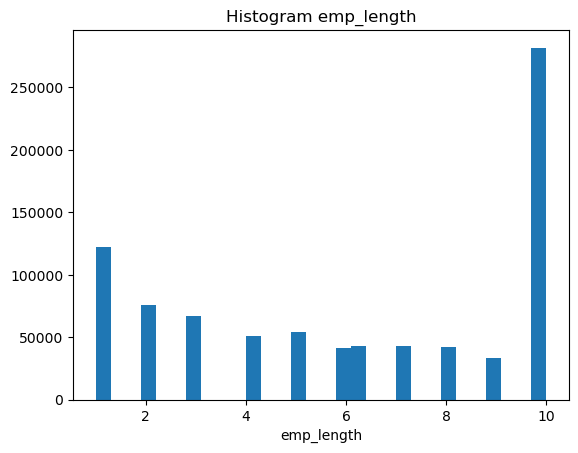

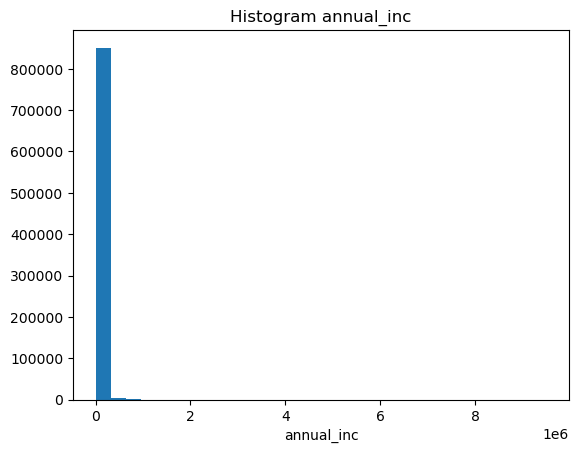

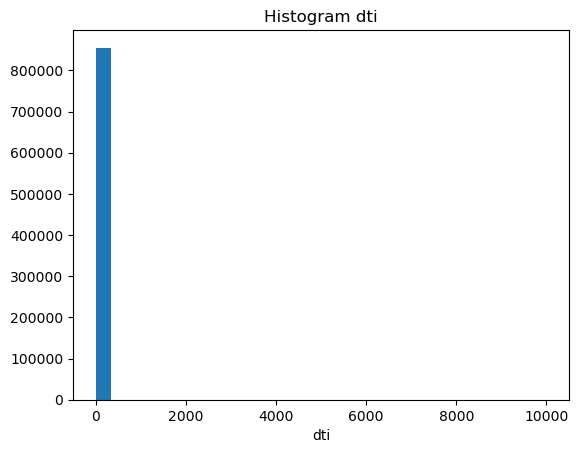

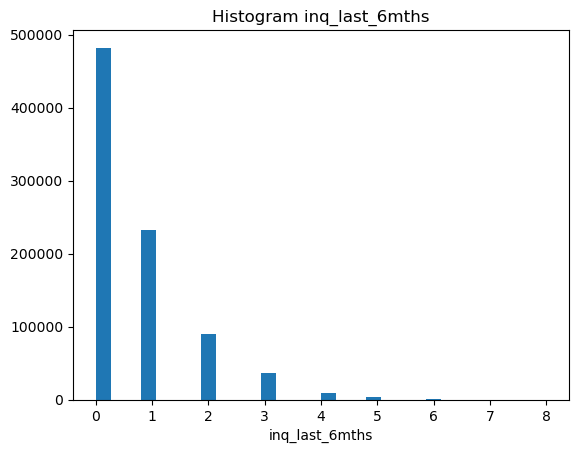

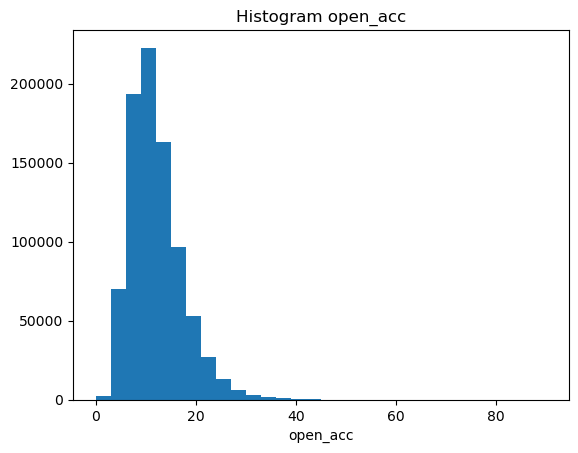

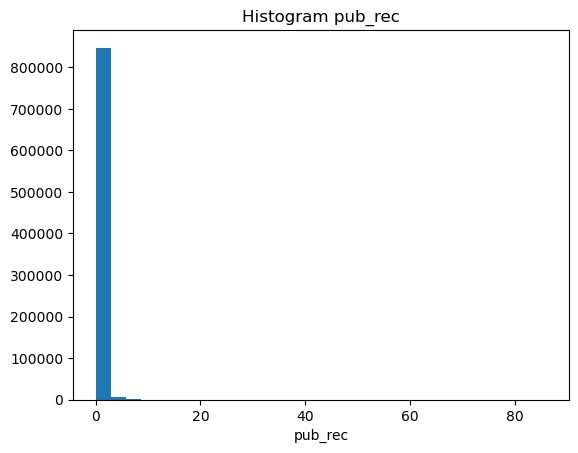

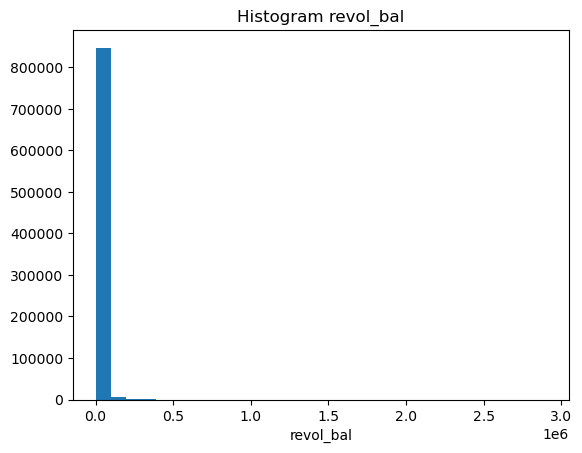

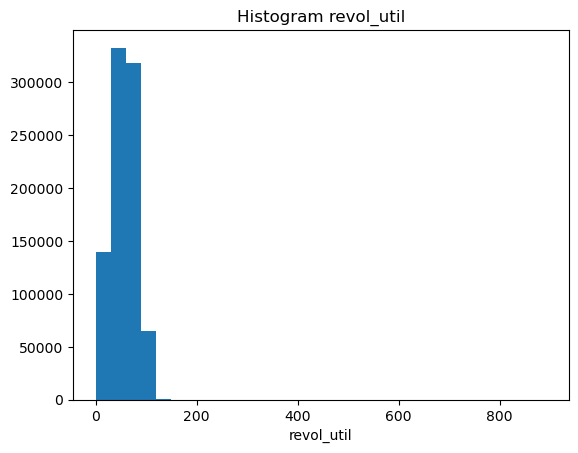

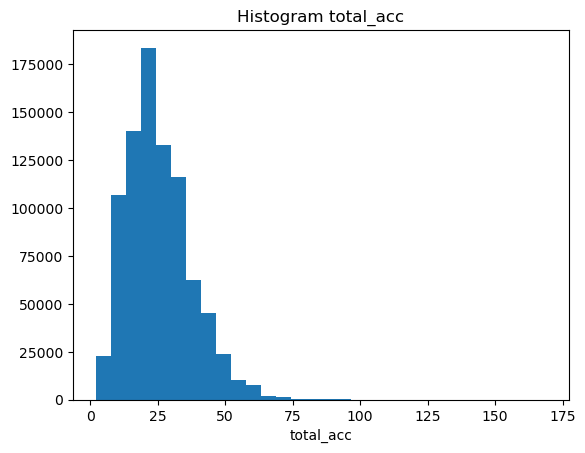

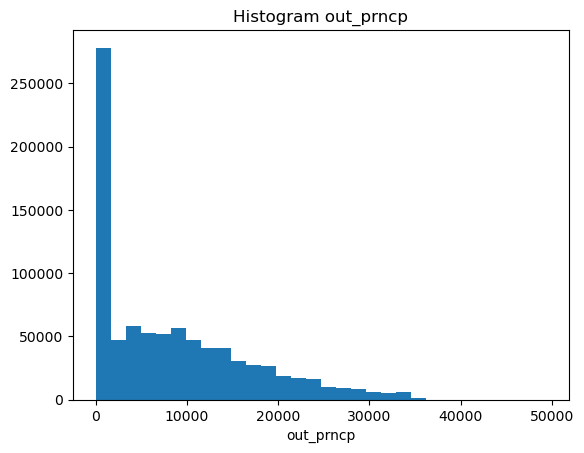

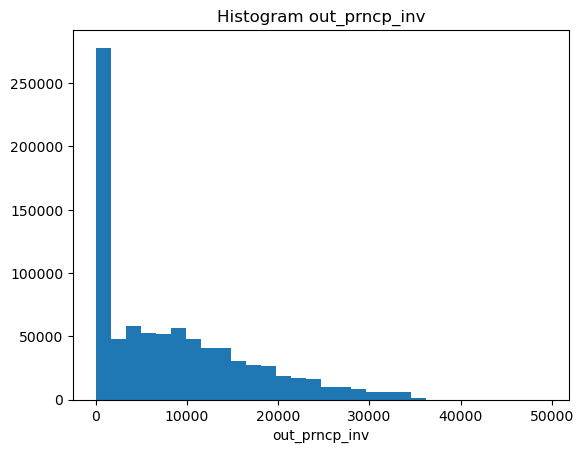

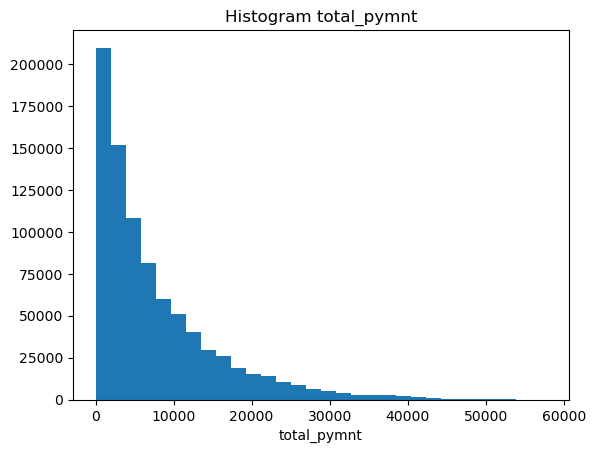

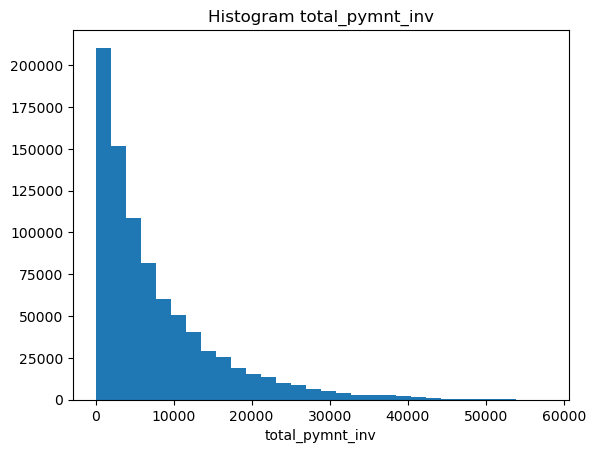

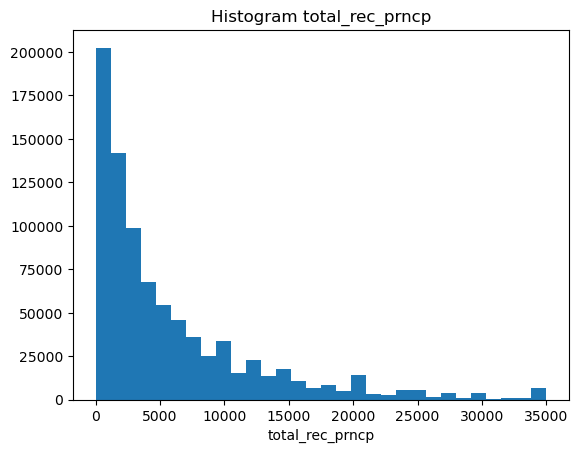

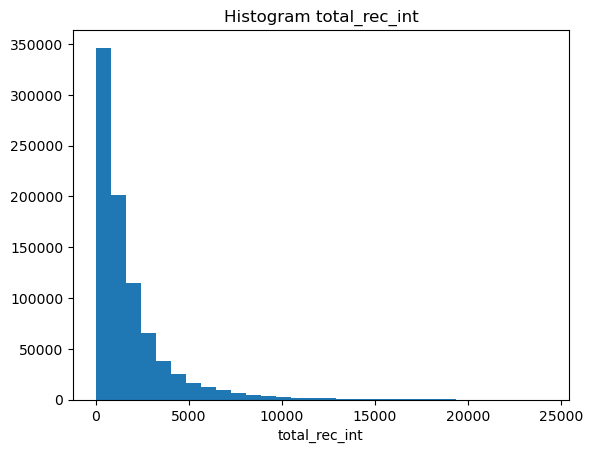

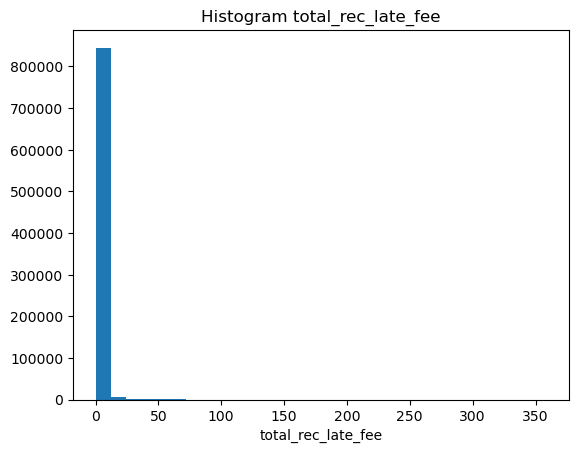

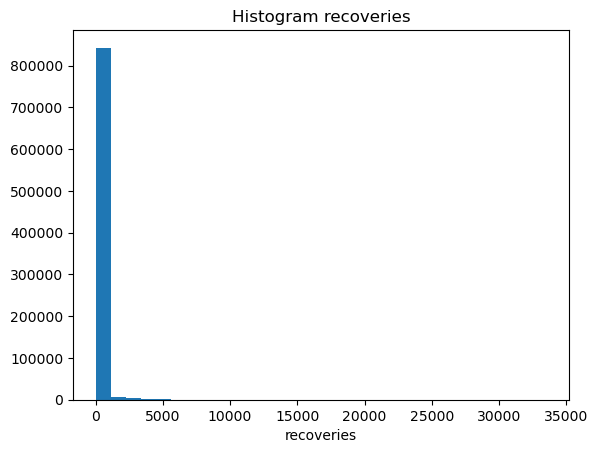

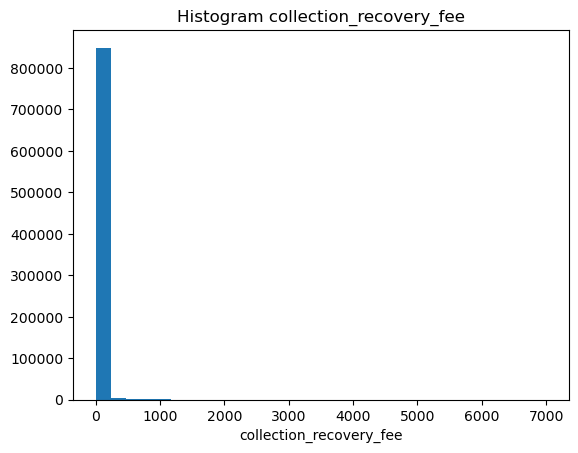

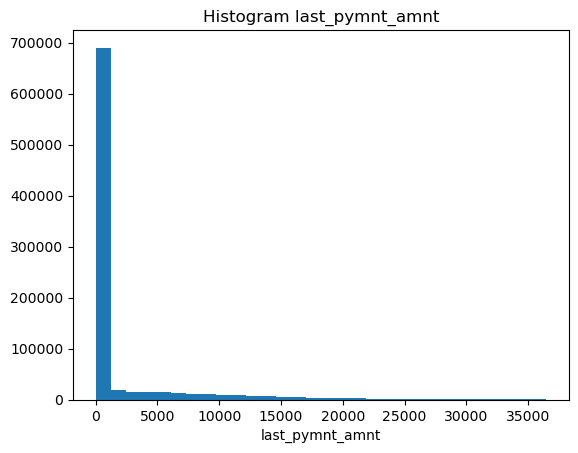

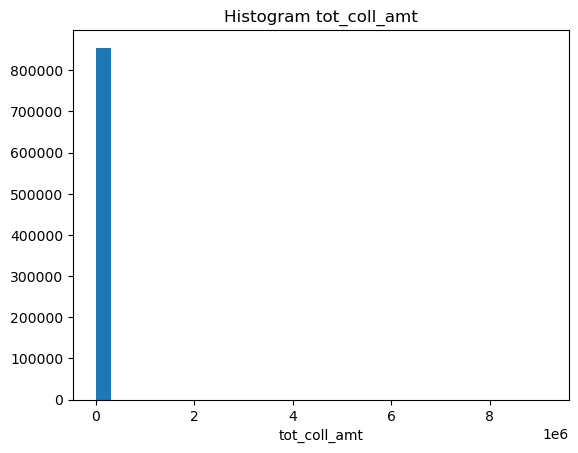

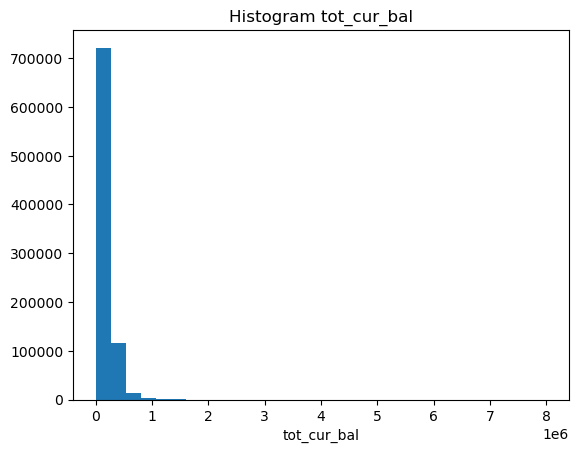

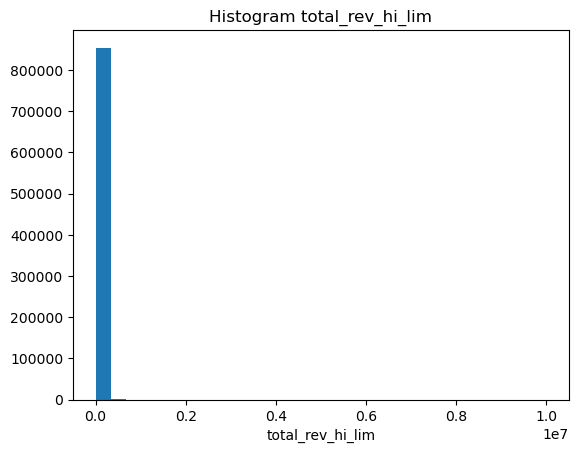

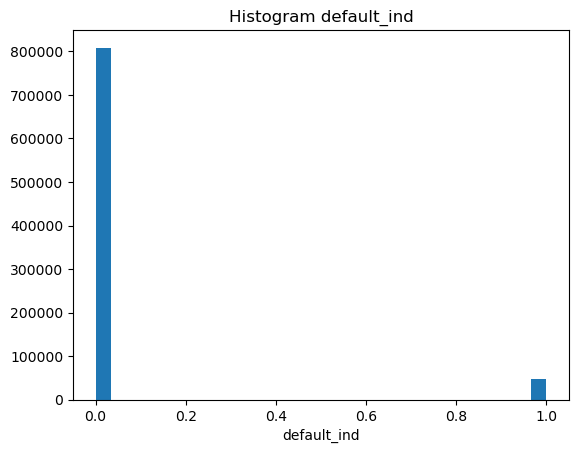

In [63]:
# Create a histogram of a numeric column
column_name1 = ['funded_amnt', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim','default_ind']

for i in column_name1:
        plt.hist(data[i],bins=30)
        plt.xlabel(i)
        plt.title(f'Histogram {i}')
        plt.show()

In [64]:
data=data.drop(["grade","sub_grade","zip_code"],axis=1)

In [65]:
data = data.drop(["emp_title","issue_d","title","earliest_cr_line","recoveries"],axis=1)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855100 entries, 0 to 855968
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       855100 non-null  int64  
 1   funded_amnt              855100 non-null  int64  
 2   term                     855100 non-null  object 
 3   int_rate                 855100 non-null  float64
 4   installment              855100 non-null  float64
 5   emp_length               855100 non-null  float64
 6   home_ownership           855100 non-null  object 
 7   annual_inc               855100 non-null  float64
 8   verification_status      855100 non-null  object 
 9   pymnt_plan               855100 non-null  object 
 10  purpose                  855100 non-null  object 
 11  dti                      855100 non-null  float64
 12  inq_last_6mths           855100 non-null  int64  
 13  open_acc                 855100 non-null  int64  
 14  pub_rec  

### One hot Encoding(Categorical columns)

In [67]:
one = pd.get_dummies(data["home_ownership"]).astype(int)
one
data = pd.concat([data,one],axis=1)
data.isnull().sum()

id                         0
funded_amnt                0
term                       0
int_rate                   0
installment                0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
pymnt_plan                 0
purpose                    0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
collection_recovery_fee    0
last_pymnt_amnt            0
application_type           0
tot_coll_amt               0
tot_cur_bal                0
total_rev_hi_lim           0
default_ind                0
ANY                        0
MORTGAGE                   0
NONE          

In [68]:
one = pd.get_dummies(data["verification_status"]).astype(int)
one
data = pd.concat([data,one],axis=1)
data.isnull().sum()

id                         0
funded_amnt                0
term                       0
int_rate                   0
installment                0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
pymnt_plan                 0
purpose                    0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
collection_recovery_fee    0
last_pymnt_amnt            0
application_type           0
tot_coll_amt               0
tot_cur_bal                0
total_rev_hi_lim           0
default_ind                0
ANY                        0
MORTGAGE                   0
NONE          

In [69]:
one = pd.get_dummies(data["pymnt_plan"]).astype(int)
one
data = pd.concat([data,one],axis=1)
data.isnull().sum()

id                         0
funded_amnt                0
term                       0
int_rate                   0
installment                0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
pymnt_plan                 0
purpose                    0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
collection_recovery_fee    0
last_pymnt_amnt            0
application_type           0
tot_coll_amt               0
tot_cur_bal                0
total_rev_hi_lim           0
default_ind                0
ANY                        0
MORTGAGE                   0
NONE          

In [70]:
one = pd.get_dummies(data["purpose"]).astype(int)
one
data = pd.concat([data,one],axis=1)
data.isnull().sum()

id                         0
funded_amnt                0
term                       0
int_rate                   0
installment                0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
pymnt_plan                 0
purpose                    0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
collection_recovery_fee    0
last_pymnt_amnt            0
application_type           0
tot_coll_amt               0
tot_cur_bal                0
total_rev_hi_lim           0
default_ind                0
ANY                        0
MORTGAGE                   0
NONE          

In [71]:
one = pd.get_dummies(data["term"]).astype(int)
one
data = pd.concat([data,one],axis=1)
data.isnull().sum()

id                         0
funded_amnt                0
term                       0
int_rate                   0
installment                0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
pymnt_plan                 0
purpose                    0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
collection_recovery_fee    0
last_pymnt_amnt            0
application_type           0
tot_coll_amt               0
tot_cur_bal                0
total_rev_hi_lim           0
default_ind                0
ANY                        0
MORTGAGE                   0
NONE          

In [72]:
one = pd.get_dummies(data["application_type"]).astype(int)
one
data = pd.concat([data,one],axis=1)
data.isnull().sum()

id             0
funded_amnt    0
term           0
int_rate       0
installment    0
              ..
wedding        0
 36 months     0
 60 months     0
INDIVIDUAL     0
JOINT          0
Length: 61, dtype: int64

In [73]:
data = data.drop("application_type",axis=1)
data.isnull().sum()

id                         0
funded_amnt                0
term                       0
int_rate                   0
installment                0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
pymnt_plan                 0
purpose                    0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
collection_recovery_fee    0
last_pymnt_amnt            0
tot_coll_amt               0
tot_cur_bal                0
total_rev_hi_lim           0
default_ind                0
ANY                        0
MORTGAGE                   0
NONE                       0
OTHER         

In [74]:
data = data.drop(["purpose","pymnt_plan","verification_status","home_ownership"],axis=1)
data["default_ind"].isnull().sum()

0

# =============================================================

In [75]:
data=data.drop(["term"],axis=1)

In [76]:
data["default_ind"].isnull().sum()

0

In [77]:
data1 = data.copy()
data1["default_ind"].isnull().sum()

0

In [78]:
data1["default_ind"]

0         0
1         1
2         0
3         0
4         0
         ..
855964    0
855965    0
855966    0
855967    0
855968    0
Name: default_ind, Length: 855100, dtype: int64

#### Transformed Cleaned data as dd

In [79]:
data1.to_csv("dd.csv",index=False)

In [80]:
#normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

datax = scaler.fit_transform(data1)

normalized_df = pd.DataFrame(data1, columns=data1.columns)

normalized_df.columns

Index(['id', 'funded_amnt', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'collection_recovery_fee', 'last_pymnt_amnt',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind', 'ANY',
       'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', 'Not Verified',
       'Source Verified', 'Verified', 'n', 'y', 'car', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', ' 36 months', ' 60 months',
       'INDIVIDUAL', 'JOINT'],
      dtype='object')

In [81]:
normalized_df["default_ind"].isnull().sum()
normalized_df["default_ind"].value_counts()

default_ind
0    808898
1     46202
Name: count, dtype: int64

In [82]:
normalized_df["A"] = np.arange(0,855100)
normalized_df.set_index('A', inplace=True)

In [83]:
normalized_df.isnull().sum()

id                         0
funded_amnt                0
int_rate                   0
installment                0
emp_length                 0
annual_inc                 0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
collection_recovery_fee    0
last_pymnt_amnt            0
tot_coll_amt               0
tot_cur_bal                0
total_rev_hi_lim           0
default_ind                0
ANY                        0
MORTGAGE                   0
NONE                       0
OTHER                      0
OWN                        0
RENT                       0
Not Verified               0
Source Verified            0
Verified      

## Balanced sample

In [84]:
Xu = normalized_df.drop(["default_ind"],axis="columns")
yu = normalized_df["default_ind"]

# Split the dataset into training and testing sets
Xu_train, Xu_test, yu_train, yu_test = train_test_split(Xu, yu, test_size=0.2, random_state=42)

In [85]:
combined_df = pd.concat([Xu_train,yu_train], axis="columns")
dd = combined_df.copy()

In [86]:
Xu_train

,id,funded_amnt,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,...,moving,other,renewable_energy,small_business,vacation,wedding,36 months,60 months,INDIVIDUAL,JOINT
A,,,,,,,,,,,,,,,,,,,,,
339682,20711077,5000,10.99,163.67,3.0,65000.0,9.71,0,12,1,...,0,0,0,0,0,0,1,0,1,0
123650,5684921,20050,15.31,480.26,5.0,75000.0,23.74,0,11,0,...,0,0,0,0,0,0,0,1,1,0
649341,55230337,9450,17.86,340.98,10.0,70707.0,2.21,0,13,0,...,0,0,0,0,0,0,1,0,1,0
812331,40374429,35000,6.92,1079.42,10.0,100000.0,14.15,0,7,0,...,0,0,0,0,0,0,1,0,1,0
553196,61453799,11600,8.18,364.47,1.0,68000.0,11.45,0,4,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,32340281,18000,16.99,447.25,2.0,65000.0,21.49,0,13,1,...,0,0,0,0,0,0,0,1,1,0
365838,17212834,13500,15.61,325.51,9.0,55984.0,24.42,0,10,0,...,0,0,0,0,0,0,0,1,1,0
131932,5184736,6000,18.75,219.18,10.0,50000.0,3.41,0,7,0,...,0,0,0,1,0,0,1,0,1,0


In [87]:
684080/2

342040.0

In [88]:
minority_class = dd[dd["default_ind"]==1]
desire1 = 342040
resampled_minority = minority_class.sample(n=desire1, replace=True, random_state=42)

majority_class = dd[dd["default_ind"]==0]
desire2 = 342040
resampled_majority = majority_class.sample(n=desire2,replace=False,random_state=42)

our = pd.concat([resampled_minority,resampled_majority],axis=0)
our

,id,funded_amnt,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,...,other,renewable_energy,small_business,vacation,wedding,36 months,60 months,INDIVIDUAL,JOINT,default_ind
A,,,,,,,,,,,,,,,,,,,,,
89056,7048231,11100,21.60,304.06,3.000000,32000.00,21.90,5,11,0,...,0,0,0,0,0,0,1,1,0,1
403385,13277617,8325,20.49,311.47,7.000000,36800.00,25.73,0,12,0,...,0,0,0,0,0,1,0,1,0,1
61742,8605612,11000,15.10,262.27,6.102489,45000.00,19.63,1,10,1,...,0,0,0,0,0,0,1,1,0,1
766030,44795215,22250,24.50,646.57,5.000000,58769.51,14.07,1,14,1,...,0,0,0,0,0,0,1,1,0,1
196004,1475054,20000,16.29,706.01,1.000000,70000.00,23.59,1,14,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86344,7092203,8000,15.88,280.79,1.000000,25000.00,9.10,0,4,0,...,0,0,0,0,0,1,0,1,0,0
263090,32188298,28000,10.99,608.65,10.000000,150000.00,22.89,0,14,0,...,0,0,0,0,0,0,1,1,0,0
699192,51246217,8000,12.69,268.36,3.000000,54500.00,20.94,1,10,0,...,0,0,0,0,0,1,0,1,0,0


In [89]:
balanced_dataset = our.sample(frac=1, random_state=42)#frac helps us to randomize our data

In [90]:
balanced_dataset = balanced_dataset.drop("id",axis=1)

In [91]:
balanced_dataset["default_ind"].value_counts()

default_ind
1    342040
0    342040
Name: count, dtype: int64

In [92]:
Xu_test["default_ind"] = yu_test
test = Xu_test.copy()
test["default_ind"].value_counts()

default_ind
0    161877
1      9143
Name: count, dtype: int64

In [93]:
test = test.drop("id",axis=1)

In [94]:
Xuu_train = balanced_dataset.drop(["default_ind"],axis="columns")
yuu_train = balanced_dataset["default_ind"]
Xuu_test = test.drop(["default_ind"],axis="columns")
yuu_test = test["default_ind"]

In [95]:
yu_test.isnull().sum()

0

# Principal Component Analysis

In [96]:
data = pd.read_csv("C://Users//sahil//OneDrive//Desktop//dd.csv")

In [97]:
pd.set_option('display.max_columns', None)

In [98]:
data.corr()

,funded_amnt,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,default_ind,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,INDIVIDUAL,JOINT
funded_amnt,1.000000,0.143200,0.945835,0.103378,0.334581,0.020068,-0.029206,0.198262,-0.082199,0.337053,0.119454,0.220923,0.641470,0.641472,0.478118,0.478980,0.394487,0.536403,0.026141,0.232943,0.336885,0.315474,-0.004788,0.191347,-0.000566,-0.005018,-0.020614,-0.182636,-0.278777,0.068736,0.201706,-0.070122,0.038166,0.095041,-0.017158,-0.013953,0.000908,-0.053074,-0.066899,-0.063380,-0.128837,-0.014371,0.007549,-0.073642,-0.025886,-0.011073,0.011073
int_rate,0.143200,1.000000,0.130523,0.010219,-0.073859,0.078473,0.231777,-0.011019,0.052589,-0.035334,0.271714,-0.039501,0.033964,0.033820,0.173450,0.174497,0.059346,0.446619,0.050690,0.107406,-0.080395,-0.150068,0.155078,-0.060646,0.003066,-0.000075,0.002031,0.060619,-0.217528,0.001382,0.211209,-0.028724,-0.184152,0.097414,-0.006984,-0.012664,0.040284,-0.018982,0.029888,0.044925,0.092412,0.012634,0.073010,0.018862,0.010963,-0.009841,0.009841
installment,0.945835,0.130523,1.000000,0.087775,0.328155,0.013405,0.001764,0.182652,-0.071446,0.319669,0.131280,0.198738,0.539526,0.539521,0.520474,0.521176,0.455308,0.501882,0.036261,0.243070,0.307031,0.290765,0.005736,0.159055,0.000682,-0.002919,-0.016948,-0.151980,-0.261764,0.045816,0.208683,-0.070067,0.028935,0.093145,-0.015993,-0.017787,0.006382,-0.053780,-0.063059,-0.057832,-0.116558,-0.012177,0.021818,-0.070133,-0.021630,-0.009071,0.009071
emp_length,0.103378,0.010219,0.087775,1.000000,0.062728,0.019816,-0.006143,0.037150,0.030824,0.087252,0.034353,0.100059,0.073080,0.073088,0.048591,0.050113,0.035990,0.068372,-0.008508,0.027579,0.101373,0.081343,-0.013238,0.186635,0.001283,-0.004452,0.020957,-0.203127,-0.042983,-0.011344,0.053699,-0.018402,-0.021234,0.027337,-0.012068,0.033067,-0.011860,-0.019471,-0.002846,-0.033741,-0.005851,0.000572,-0.016547,0.004525,-0.022869,-0.000547,0.000547
annual_inc,0.334581,-0.073859,0.328155,0.062728,1.000000,-0.087145,0.037369,0.138727,-0.009080,0.298282,0.036275,0.187979,0.211154,0.211195,0.162963,0.163001,0.152004,0.130111,0.010206,0.092477,0.432170,0.273689,-0.036459,0.156243,-0.001304,-0.001216,-0.031439,-0.140312,-0.084700,0.046518,0.034882,-0.010792,0.000342,-0.021545,-0.005507,0.058777,0.005974,0.004335,-0.004031,-0.007689,-0.018128,-0.000335,0.024443,-0.009028,-0.004207,0.006218,-0.006218
dti,0.020068,0.078473,0.013405,0.019816,-0.087145,1.000000,-0.005769,0.141500,-0.022842,0.066813,0.086218,0.105711,0.057637,0.057601,-0.040753,-0.039799,-0.051046,0.008532,-0.005949,-0.028761,-0.003079,0.039075,0.004971,-0.003449,0.000267,-0.002714,0.014967,-0.005510,-0.031960,-0.009224,0.040742,-0.021605,0.007133,0.043091,-0.007117,-0.037139,-0.014143,-0.028585,-0.005336,-0.008716,-0.016485,-0.003515,-0.025180,-0.004156,-0.012031,-0.077976,0.077976
inq_last_6mths,-0.029206,0.231777,0.001764,-0.006143,0.037369,-0.005769,1.000000,0.116977,0.059486,-0.018580,-0.088232,0.142268,-0.104008,-0.104029,0.080599,0.079671,0.065135,0.088568,0.022821,0.065566,0.033336,0.003580,0.074160,0.037380,-0.001444,0.003970,-0.002674,-0.036607,-0.051920,-0.030547,0.082214,0.005518,-0.039605,-0.009336,0.007917,0.040080,0.023834,0.015370,0.006861,0.006641,0.010136,0.003051,0.029909,0.006198,0.011473,0.002023,-0.002023
open_acc,0.198262,-0.011019,0.182652,0.037150,0.138727,0.141500,0.116977,1.000000,-0.026507,0.225214,-0.146512,0.694353,0.170062,0.170065,0.042874,0.043945,0.031582,0.061173,-0.009211,0.028717,0.252525,0.332263,-0.020054,0.123791,-0.000721,-0.004678,-0.005614,-0.122800,-0.033701,-0.007461,0.040626,-0.033287,0.02501

In [99]:
data

,funded_amnt,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,default_ind,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,INDIVIDUAL,JOINT
0,5000,10.65,162.87,10.0,24000.0,27.65,1,3,0,13648,83.7,9,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,171.62,42906.76637,17331.711770,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2500,15.27,59.83,1.0,30000.0,1.00,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,119.66,2326.84646,1696.121239,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2400,15.96,84.33,10.0,12252.0,8.72,2,2,0,2956,98.5,10,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,649.91,10577.59795,2416.493577,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,10000,13.49,339.31,10.0,49200.0,20.00,1,10,0,5598,21.0,37,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,357.48,122305.52760,15595.783870,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,3000,12.69,67.79,1.0,80000.0,17.94,0,15,0,27783,53.9,38,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,67.79,173111.76930,48865.593010,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855095,10000,11.99,332.10,8.0,31000.0,28.69,0,9,1,14037,82.1,15,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,332.10,25274.00000,17100.000000,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
855096,24000,11.99,797.03,10.0,79000.0,3.90,1,5,0,8621,84.5,23,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,797.03,140285.00000,10200.000000,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
855097,13000,15.99,316.07,5.0,35000.0,30.90,0,9,1,11031,61.3,22,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,316.07,34178.00000,18000.000000,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
855098,12000,19.99,317.86,1.0,64400.0,27.19,2,17,0,8254,30.6,20,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,317.86,58418.00000,27000.000000,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [100]:
data = data.drop("NONE",axis=1)

In [101]:
data = data.drop(["INDIVIDUAL","JOINT"],axis=1)

In [102]:
data["default_ind"].value_counts()

default_ind
0    808898
1     46202
Name: count, dtype: int64

In [103]:
pd.set_option('display.max_columns', None)

In [104]:
data["inq_last_6mths"].value_counts()

inq_last_6mths
0    482224
1    232749
2     90370
3     35829
4      9583
5      3356
6       920
7        48
8        21
Name: count, dtype: int64

In [105]:
data["MORTGAGE"].value_counts()

MORTGAGE
1    428899
0    426201
Name: count, dtype: int64

In [106]:
data["OTHER"].value_counts()

OTHER
0    854959
1       141
Name: count, dtype: int64

In [107]:
data["RENT"].value_counts()

data["Not Verified"].value_counts()

Not Verified
0    597781
1    257319
Name: count, dtype: int64

In [108]:
data["Source Verified"].value_counts()

data["Verified"].value_counts()

data["credit_card"].value_counts()

data["debt_consolidation"].value_counts()

data["educational"].value_counts()

data["home_improvement"].value_counts()

data["house"].value_counts()

data["major_purchase"].value_counts()

data["medical"].value_counts()

data["moving"].value_counts()

data["other"].value_counts()

data["renewable_energy"].value_counts()

data["small_business"].value_counts()

data["vacation"].value_counts()

vacation
0    850582
1      4518
Name: count, dtype: int64

In [109]:
Xu = data.drop(["default_ind"],axis="columns")
yu = data["default_ind"]

# Split the dataset into training and testing sets
Xu_train, Xu_test, yu_train, yu_test = train_test_split(Xu, yu, test_size=0.2, random_state=42)

Xu_train

,funded_amnt,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,MORTGAGE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
339682,5000,10.99,163.67,3.0,65000.0,9.71,0,12,1,5083,32.4,13,2704.66,2704.66,2946.06,2946.06,2295.34,650.72,0.0,163.67,6642.0,15700.0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
123650,20050,15.31,480.26,5.0,75000.0,23.74,0,11,0,21299,62.6,26,11580.31,11580.31,14888.06,14888.06,8469.69,6418.37,0.0,480.26,43946.0,34000.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
649341,9450,17.86,340.98,10.0,70707.0,2.21,0,13,0,2843,31.6,16,8418.07,8351.26,1695.52,1682.06,1031.93,663.59,0.0,340.98,410656.0,9000.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
812331,35000,6.92,1079.42,10.0,100000.0,14.15,0,7,0,38241,82.2,33,25063.33,25063.33,11860.16,11860.16,9936.67,1923.49,0.0,1079.42,254709.0,46500.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
553196,11600,8.18,364.47,1.0,68000.0,11.45,0,4,1,11005,79.2,12,10737.96,10737.96,1080.23,1080.23,862.04,218.19,0.0,364.47,61688.0,13900.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,18000,16.99,447.25,2.0,65000.0,21.49,0,13,1,6069,43.3,26,15043.91,15043.91,6341.00,6341.00,2956.09,3384.91,0.0,447.25,95809.0,14000.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
365838,13500,15.61,325.51,9.0,55984.0,24.42,0,10,0,23775,78.5,18,0.00,0.00,15756.75,15756.75,13500.00,2256.75,0.0,11850.63,234749.0,30300.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
131932,6000,18.75,219.18,10.0,50000.0,3.41,0,7,0,4415,20.3,8,1046.28,1046.28,6794.58,6794.58,4953.72,1840.86,0.0,219.18,4415.0,21800.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
671155,12000,8.18,244.36,10.0,80000.0,23.70,0,10,0,21134,33.2,30,11176.04,11176.04,1216.35,1216.35,823.96,392.39,0.0,244.36,242948.0,63700.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [110]:
combined_df = pd.concat([Xu_train,yu_train], axis="columns")
dd = combined_df.copy()

minority_class = dd[dd["default_ind"]==1]
desire1 = 342040
resampled_minority = minority_class.sample(n=desire1, replace=True, random_state=42)

majority_class = dd[dd["default_ind"]==0]
desire2 = 342040
resampled_majority = majority_class.sample(n=desire2,replace=False,random_state=42)
our = pd.concat([resampled_minority,resampled_majority],axis=0)

balanced_dataset = our.sample(frac=1, random_state=42)

balanced_dataset["default_ind"].value_counts()

default_ind
1    342040
0    342040
Name: count, dtype: int64

In [111]:
Xu_test["default_ind"] = yu_test
test = Xu_test.copy()
test["default_ind"].value_counts()

Xuu_train = balanced_dataset.drop(["default_ind"],axis="columns")
yuu_train = balanced_dataset["default_ind"]
Xuu_test = test.drop(["default_ind"],axis="columns")
yuu_test = test["default_ind"]

In [112]:
scaler = StandardScaler()
Xk_train_scaled = scaler.fit_transform(Xuu_train)
Xk_test_scaled = scaler.transform(Xuu_test)


Xk_train_scaled = pd.DataFrame(Xk_train_scaled)
Xk_test_scaled = pd.DataFrame(Xk_test_scaled)

In [113]:
from sklearn.decomposition import PCA

# Assuming Xuu_train and Xuu_test are NumPy arrays
n_components = min(Xk_train_scaled.shape[0], Xk_train_scaled.shape[1], 42)
pca = PCA(n_components=n_components)

# Apply PCA on the training data, excluding the constant term (assuming Xuu_train is a DataFrame)
X_train_pca = pca.fit_transform(Xk_train_scaled.iloc[:, 1:])

# Transform the test data using the same PCA
X_test_pca = pca.transform(Xk_test_scaled.iloc[:, 1:])



# Logistic Regression

In [114]:
logit_model_pca = sm.Logit(yuu_train, X_train_pca)
result_pca = logit_model_pca.fit()

# Display the model summary
print(result_pca.summary())


Optimization terminated successfully.
         Current function value: 0.136780
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:            default_ind   No. Observations:               684080
Model:                          Logit   Df Residuals:                   684040
Method:                           MLE   Df Model:                           39
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.8027
Time:                        20:30:11   Log-Likelihood:                -93568.
converged:                       True   LL-Null:                   -4.7417e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9764      0.009   -114.826      0.000      -0.993      -0.960
x2            -0.4994      0

In [115]:
y_pred_pca = result_pca.predict(X_test_pca)
y_pred_binary_pca = (y_pred_pca > 0.5).astype(int)


accuracy_pca = accuracy_score(yuu_test, y_pred_binary_pca)
accuracy_pca


from sklearn.metrics import f1_score
f1 = f1_score(yuu_test, y_pred_binary_pca)

print(f'F1 Score: {f1:.4f}')

F1 Score: 0.9410


In [116]:
from sklearn.metrics import classification_report

# Assuming y_true contains the true labels and y_pred contains the predicted labels

# Generate classification report
report1 = classification_report(yuu_test, y_pred_binary_pca)

# Print the classification report
print(report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    161877
           1       0.93      0.95      0.94      9143

    accuracy                           0.99    171020
   macro avg       0.96      0.97      0.97    171020
weighted avg       0.99      0.99      0.99    171020



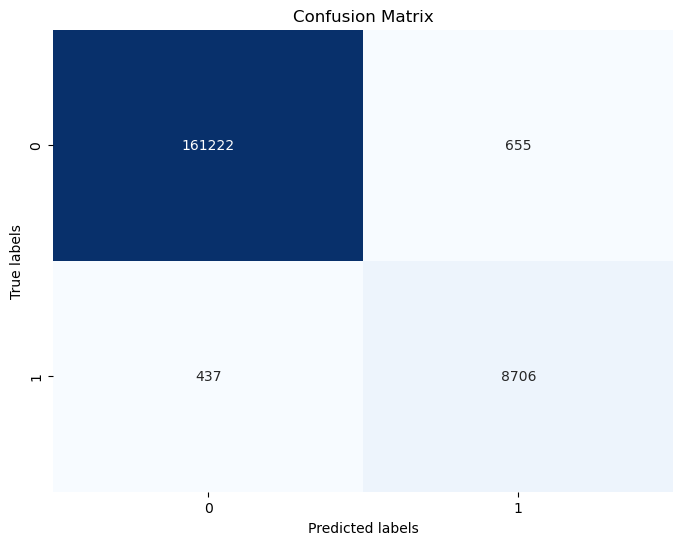

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(yuu_test, y_pred_binary_pca)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()